# Select study sites from the distribution of RGI glacier areas


In [7]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import shapely
import os
import glob

In [3]:
os.listdir('/Users/icebergs/snow-cover-mapping/')

['.DS_Store',
 'zipped folders',
 'GoogleDrive.pkg',
 'study-sites',
 '01_rgi60_Alaska',
 '02_rgi60_WesternCanadaUS',
 'snow-cover-mapping',
 '.ipynb_checkpoints',
 'select_study_sites.ipynb']

In [4]:
# Define paths in directory
RGI_path = '/Users/icebergs/snow-cover-mapping/'
RGI_fns = ['01_rgi60_Alaska/01_rgi60_Alaska.shp', 
           '02_rgi60_WesternCanadaUS/02_rgi60_WesternCanadaUS.shp']

out_path = RGI_path + 'study-sites/'


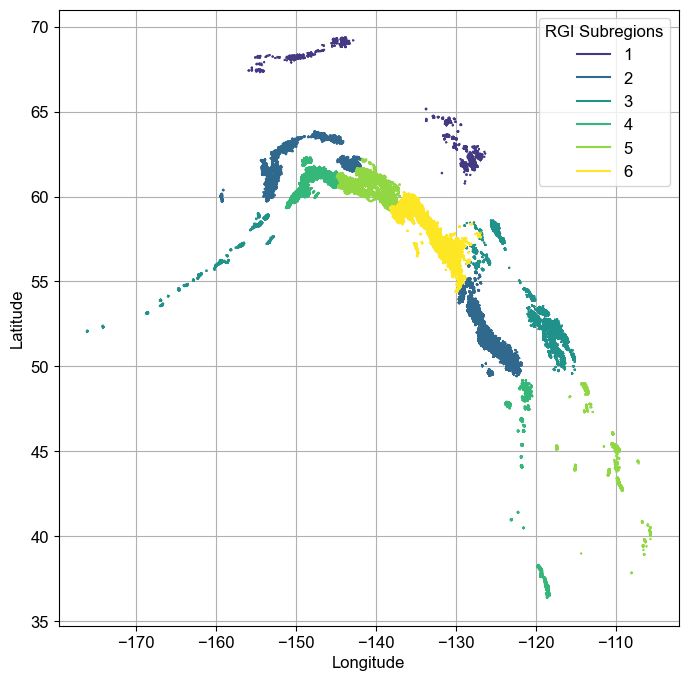

figure saved to file


In [8]:
# Create geopandas.DataFrame for storing RGIs
RGI = gpd.GeoDataFrame()
# Read RGI files
for RGI_fn in RGI_fns:
    file = gpd.read_file(RGI_path + RGI_fn)
    RGI = pd.concat([RGI, file])

# subset to glaciers with area > 5 km^2
# RGI_gt5 = RGI.loc[RGI['Area'] > 5].reset_index(drop=True)

# change int data types to float for saving
RGI[['Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 'Status', 'Connect', 
         'Form', 'TermType', 'Surging', 'Linkages']] = RGI[['Zmin', 'Zmax', 'Zmed', 'Slope', 'Aspect', 'Lmax', 
                                                            'Status', 'Connect', 'Form', 'TermType', 'Surging', 'Linkages']].astype(float)

# grab list of all subregions in dataset
subregions = np.unique(RGI_gt5['O2Region']) 

# plot all sites with color distinguishing subregions
fig1, ax1 = plt.subplots(1, 1, figsize=(8,8))
plt.rcParams.update({'font.size':12, 'font.sans-serif':'Arial'})
for subregion in subregions:
    RGI_subregion = RGI.loc[RGI['O2Region']==subregion]
    for j in range(0, len(RGI_subregion)):
        polygon = RGI_subregion.iloc[j]['geometry']
        if j==0:
            label=subregion
        else:
            label='_nolegend_'
        if type(polygon)==shapely.geometry.Polygon:
            ax1.plot(*polygon.exterior.xy, color=plt.cm.viridis(int(subregion)/len(subregions)), label=label)
ax1.legend(title='RGI Subregions')
ax1.set_xlabel('Longitude')
ax1.set_ylabel('Latitude')
ax1.grid()
plt.show()

# save figure to file
fig1.savefig(out_path + '../RGI_subregions_1-6.png', facecolor='w', dpi=300)
print('figure saved to file')

RGI Subregion 1
----------


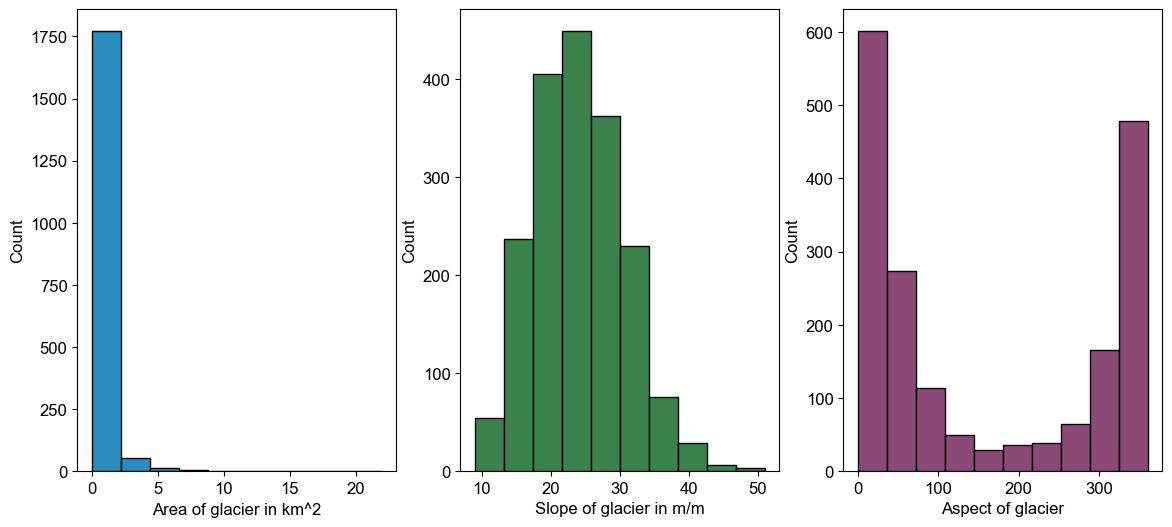

 
RGI Subregion 2
----------


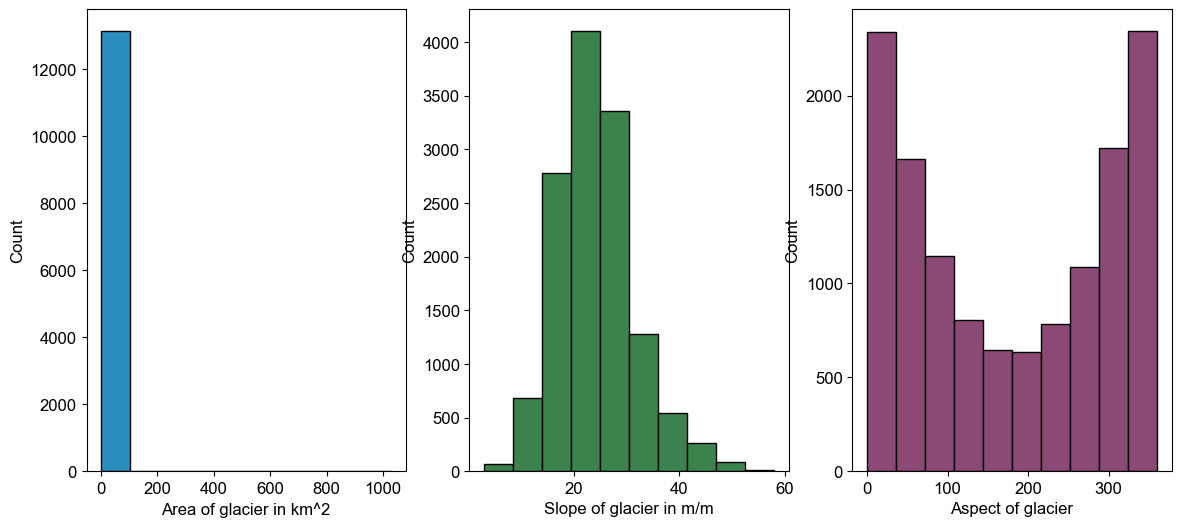

 
RGI Subregion 3
----------


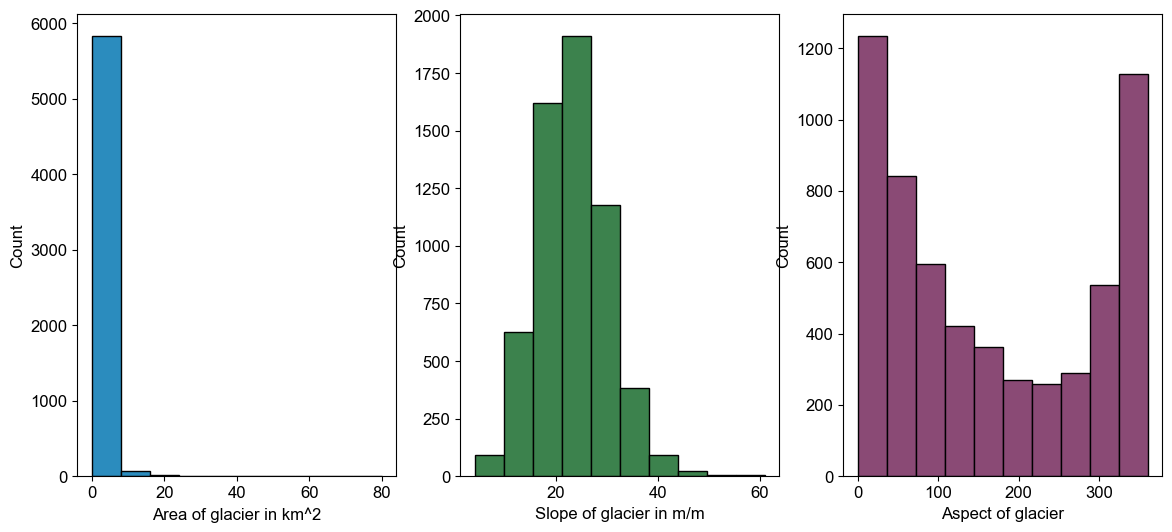

 
RGI Subregion 4
----------


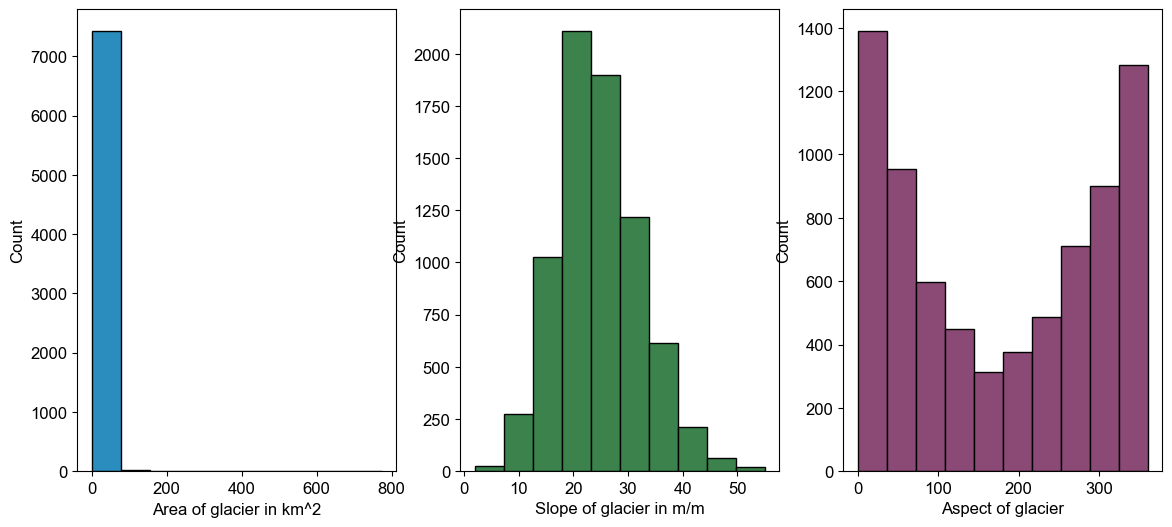

 
RGI Subregion 5
----------


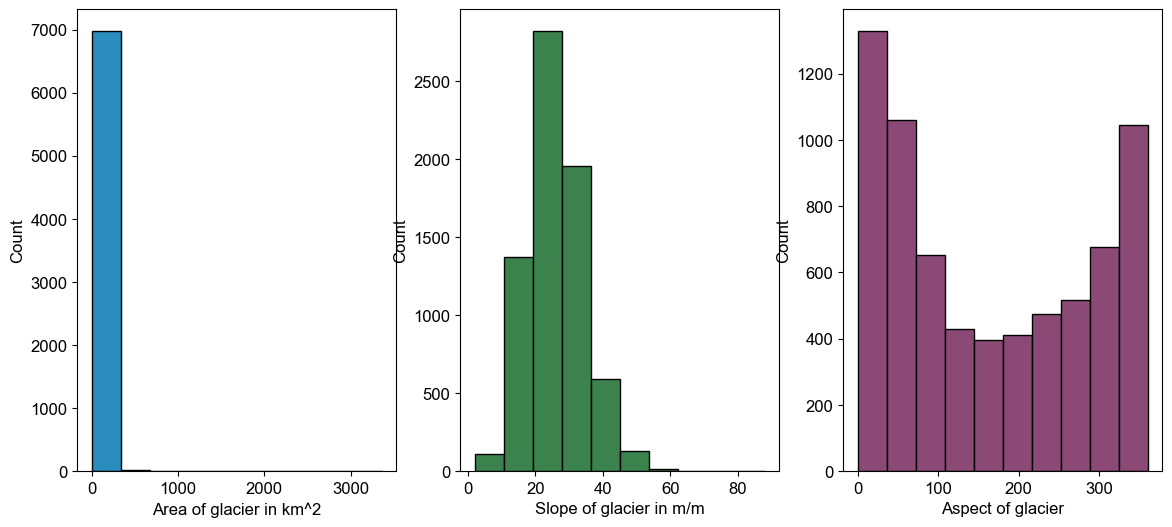

 
RGI Subregion 6
----------


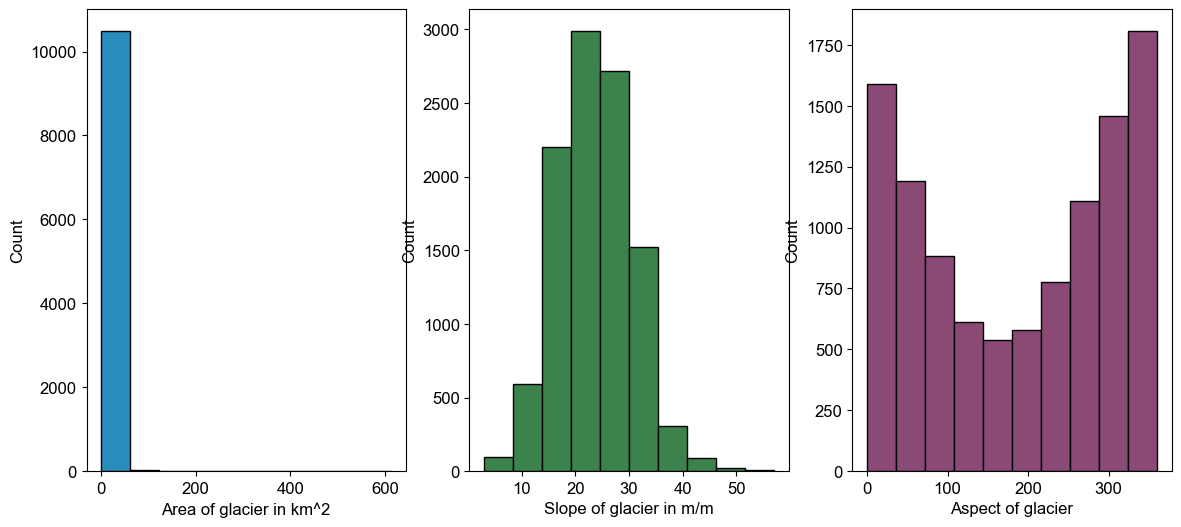

In [31]:
# Select random glaciers from each subregion that represent the overall area distribution
# and save shapefiles to out_path

# nsites = 10 # number of sites to include from each region
for subregion in subregions:

    print('RGI Subregion '+subregion)
    print('----------')
    
    # subset dataset to subregion
    RGI_subregion = RGI.loc[RGI['O2Region']==subregion]
    
    # set up figure
    fig2, ax2 = plt.subplots(1, 3, figsize=(14, 6))
    
    # -----Area
    # calculate min and max glacier areas in subregion
    area_min = np.nanmin(RGI_subregion['Area'].values)
    area_max = np.nanmax(RGI_subregion['Area'].values)
    # calculate histogram of overall distribution
    counts, edges, bars = ax2[0].hist(RGI_subregion['Area'].values, bins=10, 
                                  range=[np.round(area_min), np.round(area_max)],
                                    edgecolor='k', facecolor='#2b8cbe')
    ax2[0].set_xlabel('Area of glacier in km^2')
    ax2[0].set_ylabel('Count')

    # -----Slope
    slope_min = np.nanmin(RGI_subregion['Slope'].values)
    slope_max = np.nanmax(RGI_subregion['Slope'].values)
    
    counts, edges, bars = ax2[1].hist(RGI_subregion['Slope'].values, bins = 10, 
                                      range=[np.round(slope_min), np.round(slope_max)],
                                    edgecolor='k', facecolor='#3c824d')
    ax2[1].set_xlabel('Slope of glacier in m/m')
    ax2[1].set_ylabel('Count')
    # -----Aspect
    aspect_min = np.nanmin(RGI_subregion['Aspect'].values)
    aspect_max = np.nanmax(RGI_subregion['Aspect'].values)
    
    counts, edges, bars = ax2[2].hist(RGI_subregion['Aspect'].values, bins = 10, 
                                      range=[np.round(aspect_min), np.round(aspect_max)],
                                    edgecolor='k', facecolor='#8a4a75')
    ax2[2].set_xlabel('Aspect of glacier')
    ax2[2].set_ylabel('Count')
    
    # randomly select nsites using the histogram bins
    # counts_selected = np.zeros(len(counts), dtype=int)
    # print('Selected glaciers:')
    # for i in range(0,len(counts)):
    #     # identify number of sites to select from each bin
    #     counts_selected[i] = int(np.round(counts[i] / len(RGI_gt5_subregion) * nsites))
    #     if counts_selected[i] > 0:
    #         # subset sites to those within that area bin
    #         RGI_gt5_subregion_bin = RGI_gt5_subregion.loc[(RGI_gt5_subregion['Area']>edges[i]) & 
    #                                                       (RGI_gt5_subregion['Area']<edges[i+1])]
    #         # generate counts_selected random numbers
    #         Iselected = np.random.randint(low=0, high=len(RGI_gt5_subregion_bin), size=counts_selected[i])
    #         RGI_selected = RGI_gt5_subregion_bin.iloc[Iselected]
    #         print(RGI_selected[['RGIId', 'Name']].values)
    #         # save selected study sites to file
    #         for j in range(0,len(RGI_selected)):
    #             RGI_select = gpd.GeoDataFrame(RGI_selected.iloc[j]).transpose().reset_index(drop=True)
    #             RGIId = RGI_select['RGIId'].values[0]
    #             out_fn = RGIId + '.shp'
    #             # make folder for study site
    #             if os.path.exists(out_path + RGIId)==False:
    #                 os.mkdir(out_path + RGIId)
    #             # save file in folder
                # RGI_select.to_file(out_path + RGIId + '/' + out_fn)  
                # plot RGI outlines on figure 1
                # polygon = RGI_select['geometry'].values
                # if count==0:
                #     label='Selected study sites'
                # else:
                #     label='_nolegend_'
                # ax1.plot(*polygon.exterior.xy, color='k', label=label)
                # count+=1
            # print('selected sites saved to shapefiles in out_path.')
        
    # adjust axes
    # ax2[0].bar_label(bars)
    # ax2[0].set_xlabel('Glacier area [km$^2$]')
    # ax2[0].set_ylabel('Count')
    # ax2[0].set_title('Overall areas distribution')
    # ax2[0].grid()
    # # plot histogram for selected glaciers
    # bin_centers = np.array([(edges[i+1]-edges[i])/2+edges[i] for i in range(0, len(edges)-1)])
    # ax2[1].bar(bin_centers, counts_selected, width=edges[1]-edges[0], edgecolor='k', facecolor='#feb24c')
    # ax2[1].set_xlabel('Glacier area [km$^2$]')
    # ax2[1].grid()
    # fig2.suptitle('RGI Subregion '+subregion)
    
    plt.show()
    
    print(' ')
    